univariate analysis  
numerical: box plot, dist plot, hist plot  
catergory: count plot  

multivariate analysis


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('metrics_per_product.csv')

In [11]:
# Convert 'OrderDate' to datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Set 'OrderDate' as the index
df.set_index('OrderDate', inplace=True)

In [12]:
# Drop rows where 'ProductCategoryName' is 'Other'
df = df[df['ProductCategoryName'] != 'Other']

In [13]:
# Desired column order
desired_order = [
    'ProductCategoryName', 'OrderQty', 'UnitPrice', 'UnitPriceDiscount', 'TaxAmt', 'Freight',
    'TotalRevenue', 'Average Profit Margin',
    'Average_Revenue_Per_User'
]

# Reorder columns
df = df[desired_order]

In [14]:
df.head()

,ProductCategoryName,OrderQty,UnitPrice,UnitPriceDiscount,TaxAmt,Freight,TotalRevenue,Average Profit Margin,Average_Revenue_Per_User
OrderDate,,,,,,,,,
2011-05-31,Accessories,72.0,464.2895,0.0,85.590760,26.747106,1069.8845,447.905061,82.298808
2011-05-31,Bikes,413.0,195999.4738,0.0,33106.679432,10345.837305,413833.4929,-2915.048050,10345.837322
2011-05-31,Clothing,148.0,715.0269,0.0,165.692768,51.778989,2071.1596,-906.125246,94.143618
2011-05-31,Components,102.0,14250.0435,0.0,2014.869968,629.646863,25185.8746,-1040.167617,1679.058307
2011-06-01,Accessories,0.0,0.0000,0.0,0.000000,0.000000,0.0000,0.000000,NaN


In [15]:
df['ProductCategoryName'] = df['ProductCategoryName'].astype('category')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4496 entries, 2011-05-31 to 2014-06-30
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProductCategoryName       4496 non-null   category
 1   OrderQty                  4496 non-null   float64 
 2   UnitPrice                 4496 non-null   float64 
 3   UnitPriceDiscount         4496 non-null   float64 
 4   TaxAmt                    4496 non-null   float64 
 5   Freight                   4496 non-null   float64 
 6   TotalRevenue              4496 non-null   float64 
 7   Average Profit Margin     4496 non-null   float64 
 8   Average_Revenue_Per_User  1977 non-null   float64 
dtypes: category(1), float64(8)
memory usage: 320.7 KB


In [17]:
# Step 1: Check the unique values in the column
print(df['Average_Revenue_Per_User'].max(skipna=True))

# Step 2: Check data types
print("\nData type of 'Average Profit Margin':", df['Average_Revenue_Per_User'].dtype)

# Step 3: Check for NaN values
nan_count = df['Average_Revenue_Per_User'].isna().sum()
print("\nNumber of NaN values:", nan_count)

# Step 4: Count exact zeros
zero_count = (df['Average_Revenue_Per_User'] == 0).sum()
print("\nExact count of zeros:", zero_count)

# Step 5: Handle precision issues using numpy.isclose
import numpy as np
approx_zero_count = np.isclose(df['Average_Revenue_Per_User'], 0.0).sum()
print("\nCount of zeros with precision handling:", approx_zero_count)

27945.00559

Data type of 'Average Profit Margin': float64

Number of NaN values: 2519

Exact count of zeros: 3

Count of zeros with precision handling: 3


In [18]:
non_nan_count = df['Average_Revenue_Per_User'].count()
print(f"Number of non-NaN values in 'Average_Revenue_Per_User': {non_nan_count}")

nan_count = df['Average_Revenue_Per_User'].isna().sum()
print("\nNumber of NaN values in 'Average_Revenue_Per_User':", nan_count)

Number of non-NaN values in 'Average_Revenue_Per_User': 1977

Number of NaN values in 'Average_Revenue_Per_User': 2519


In [19]:
df.drop(columns=['Average_Revenue_Per_User'], inplace=True)

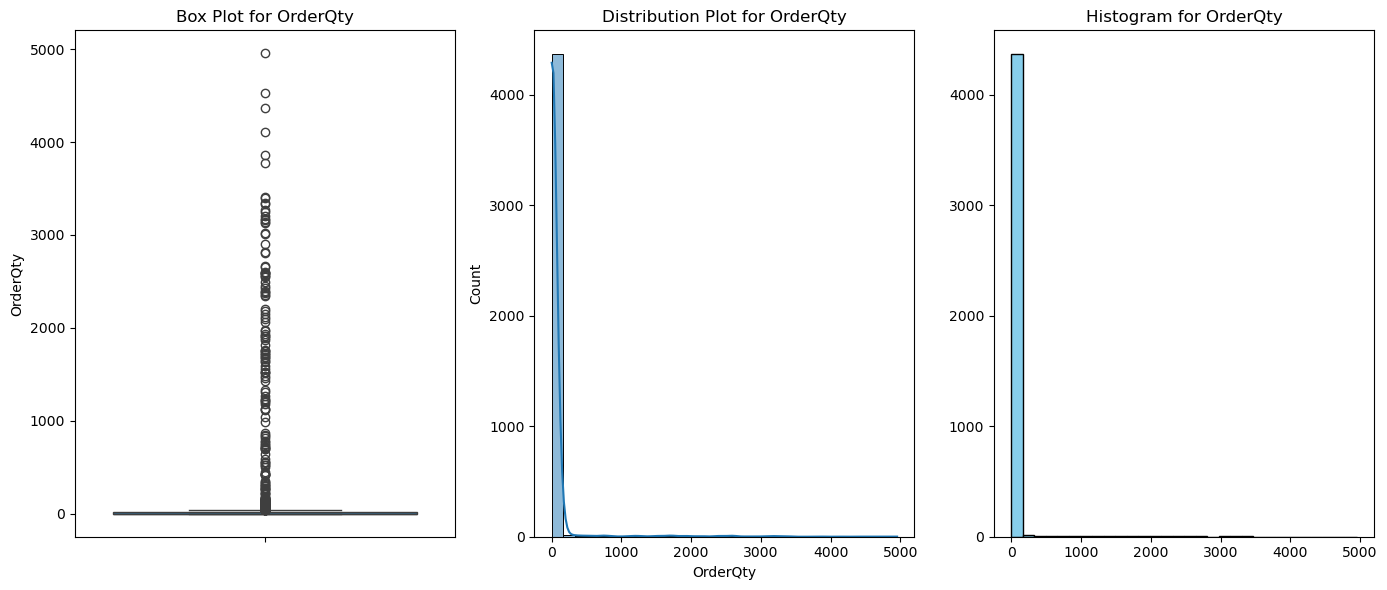

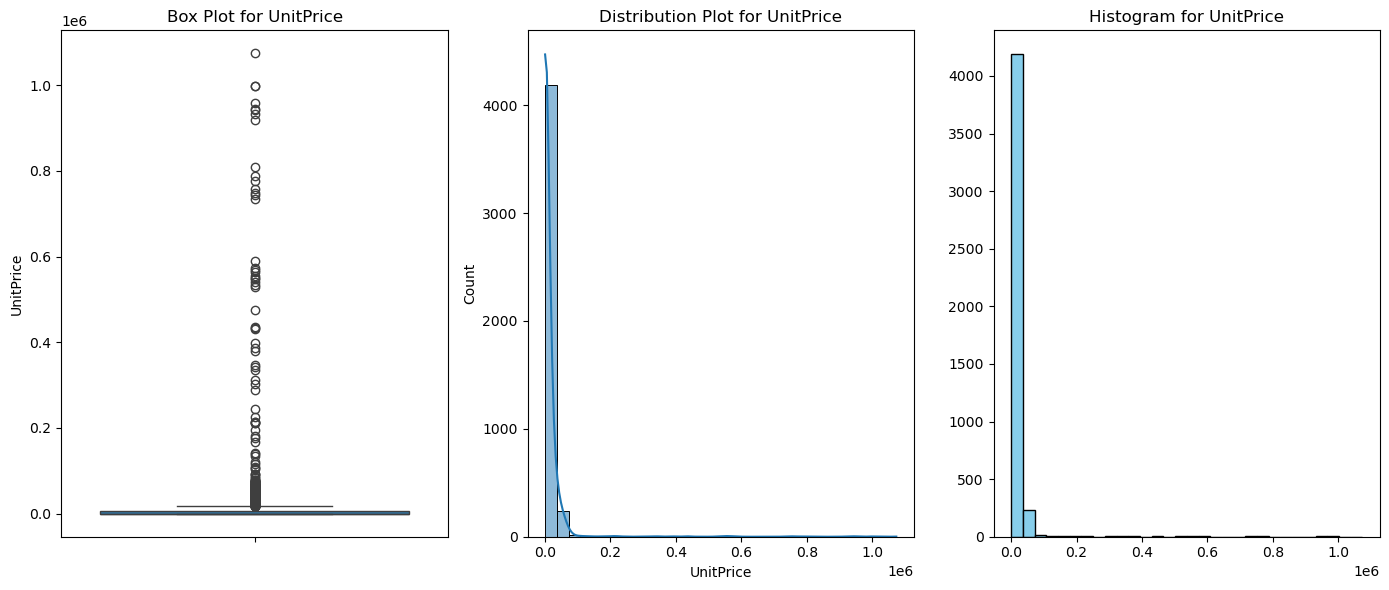

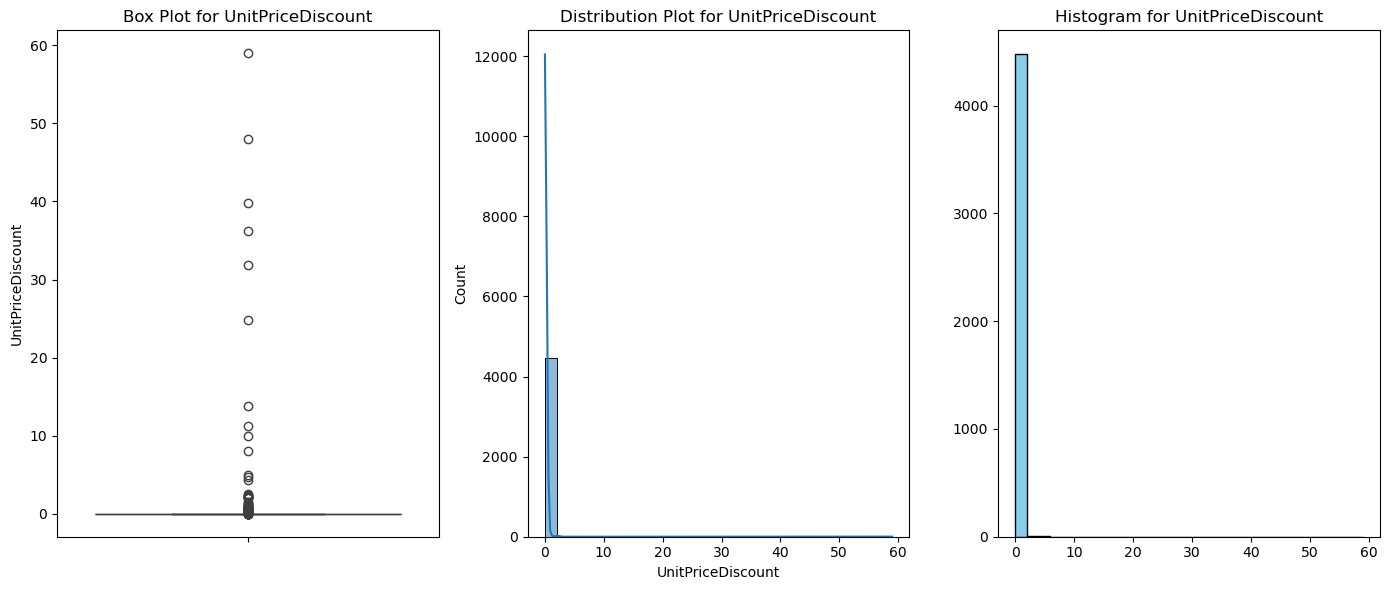

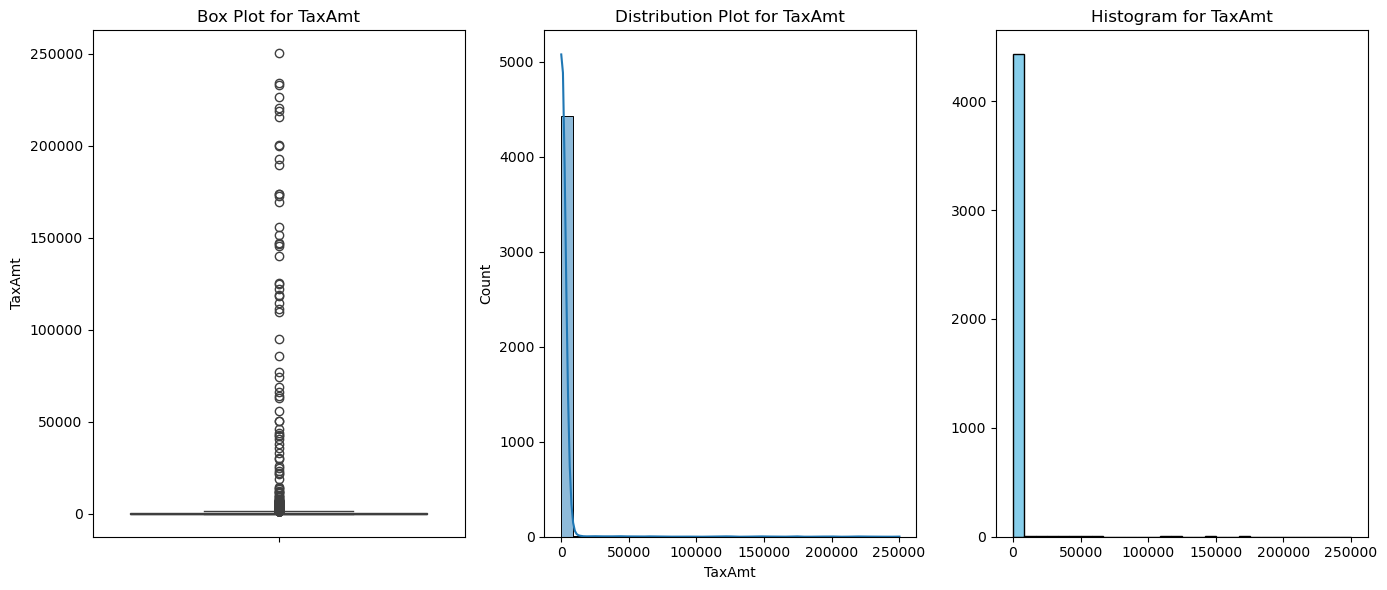

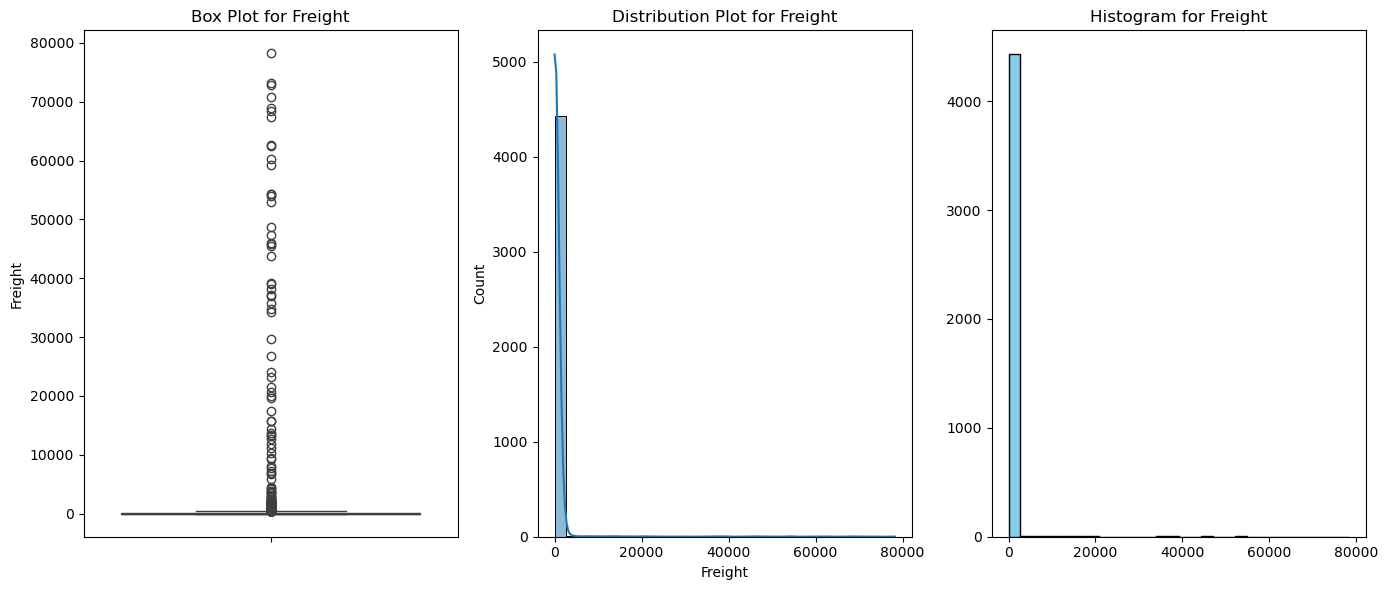

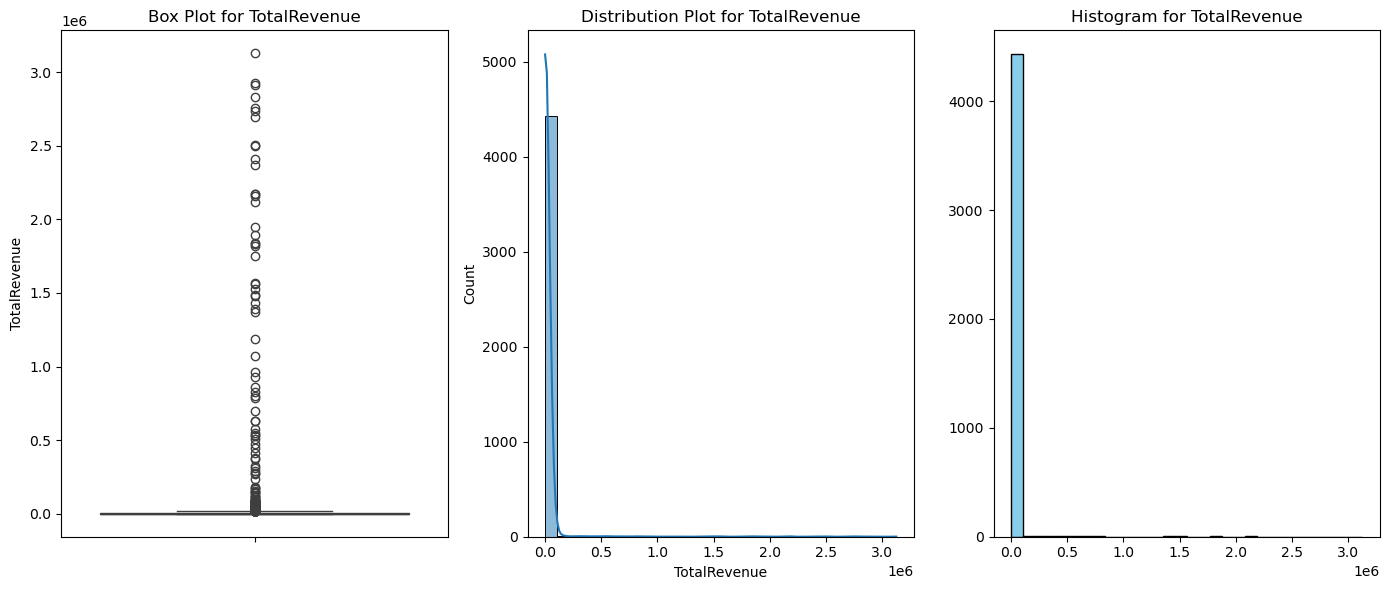

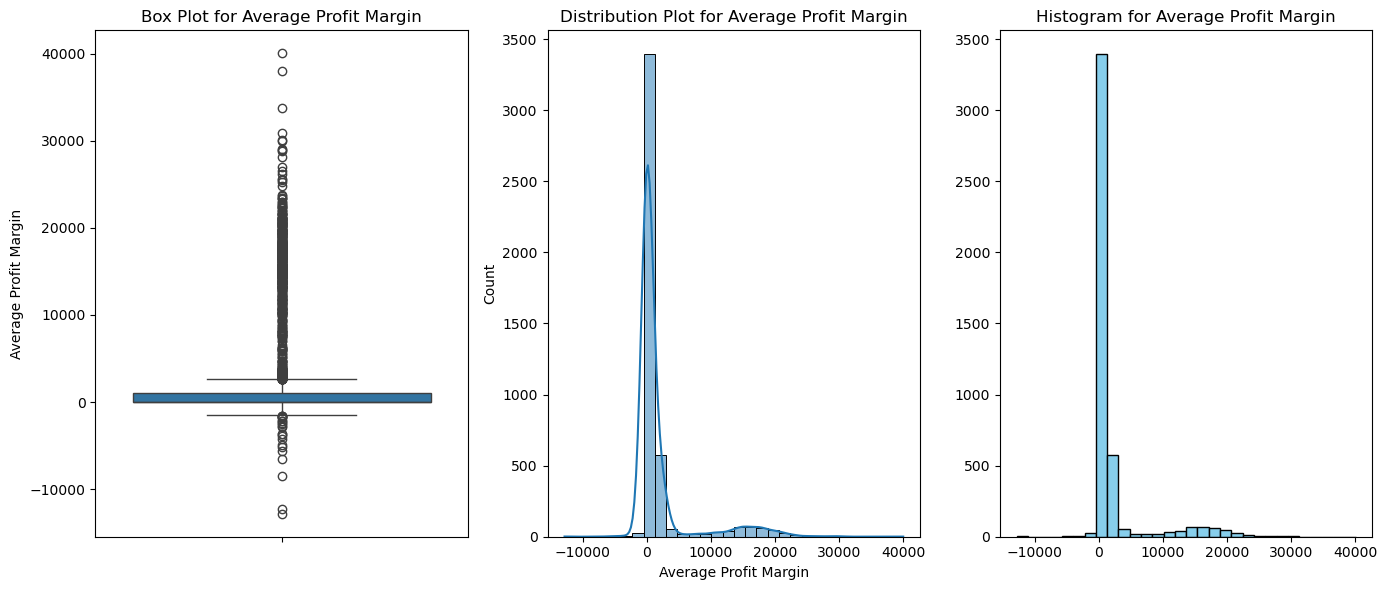

In [20]:
# Assume FactSales is your DataFrame
numeric_cols = df.select_dtypes(include='number').columns  # Select only numeric columns

# numeric_cols = numeric_cols.drop('Average_Revenue_Per_User')

# Create a directory of plots for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(14, 6))
    
    # Box Plot
    plt.subplot(1, 3, 1)  # Create subplot (1 row, 3 columns, 1st plot)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot for {col}')
    
    # Dist Plot
    plt.subplot(1, 3, 2)  # Create subplot (1 row, 3 columns, 2nd plot)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution Plot for {col}')
    
    # Hist Plot
    plt.subplot(1, 3, 3)  # Create subplot (1 row, 3 columns, 3rd plot)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram for {col}')
    
    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

In [21]:
# Generate the complete date range between the min and max OrderDate
min_date = df.index.min()
max_date = df.index.max()
complete_date_range = pd.date_range(start=min_date, end=max_date)

# Get the unique OrderDate values in the dataset
unique_dates = df.index.unique()

# Identify missing dates by set difference
missing_dates = set(complete_date_range) - set(unique_dates)

# Convert the result to a sorted list
missing_dates = sorted(missing_dates)

# Print the missing dates
print("Missing dates:")
for date in missing_dates:
    print(date)

Missing dates:
2011-07-16 00:00:00
2011-08-11 00:00:00
2011-09-23 00:00:00


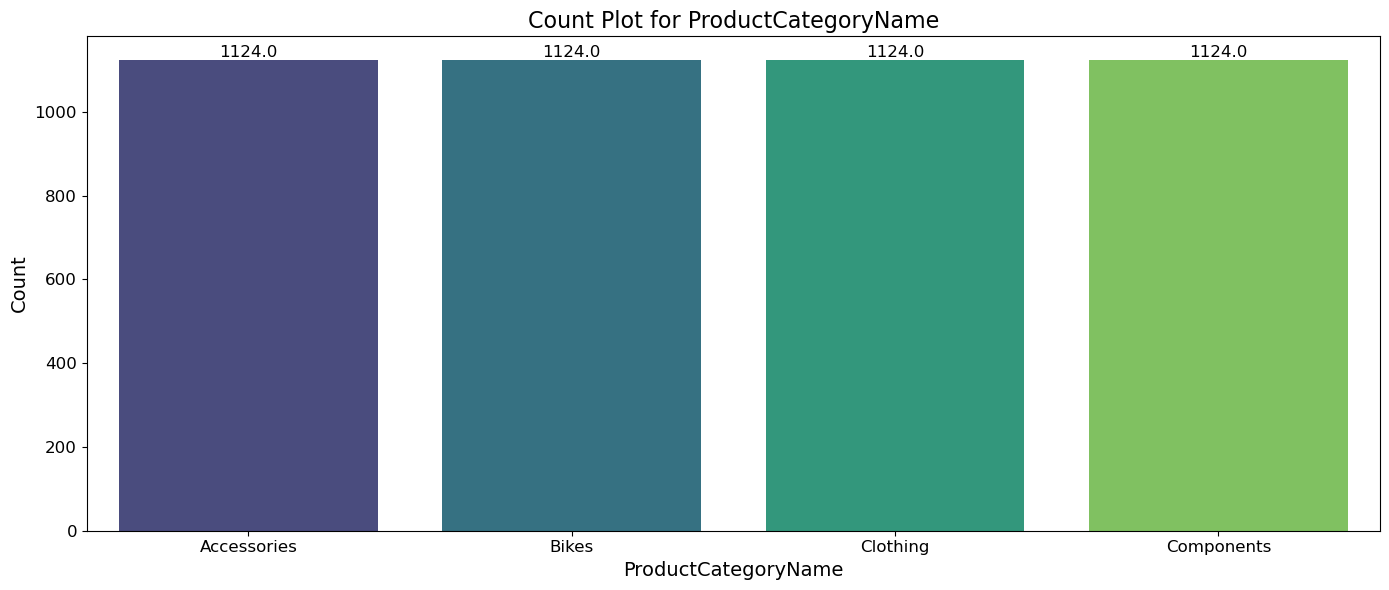

In [22]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(data=df, x='ProductCategoryName', hue='ProductCategoryName', palette='viridis', legend=False)

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() /2, height),
                xytext=(0,5),
                textcoords='offset points',
                ha='center', va='center', fontsize=12)

# Customize the plot
plt.title('Count Plot for ProductCategoryName', fontsize=16)
plt.xlabel('ProductCategoryName', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

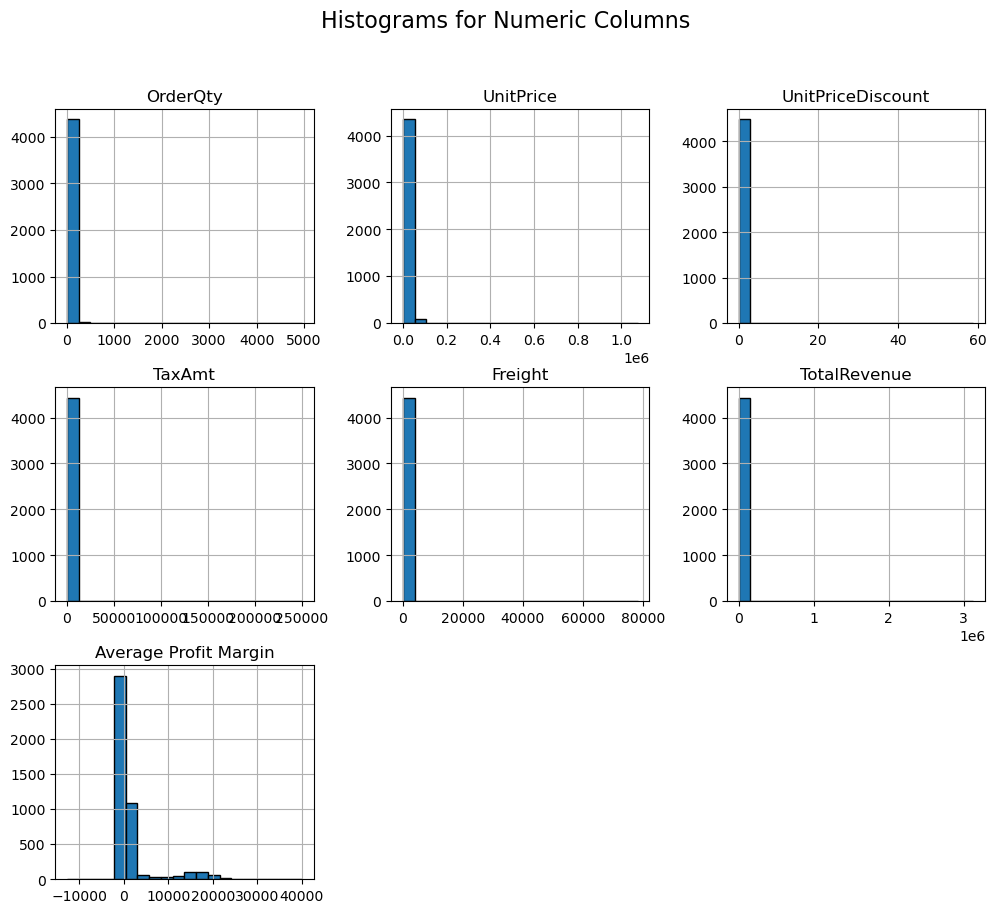

In [23]:
# Histograms for all numeric columns
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms for Numeric Columns", fontsize=16)
plt.show()


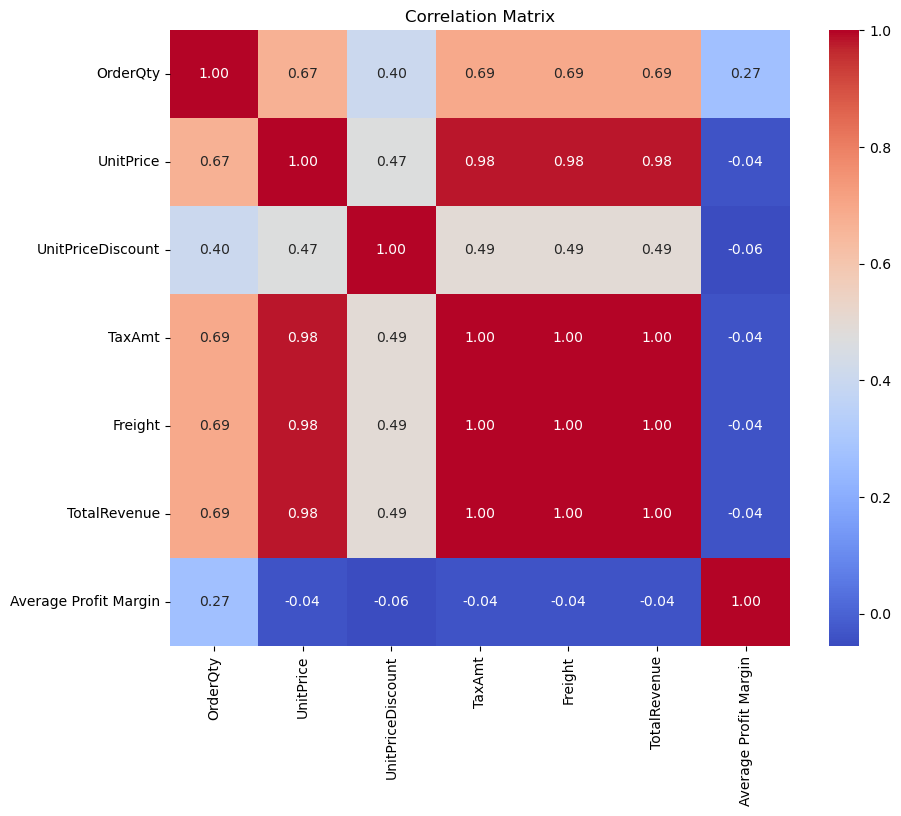

In [24]:
import numpy as np

# Correlation matrix and heatmap
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Text(0.5, 1.02, 'Pairwise Scatter Plots')

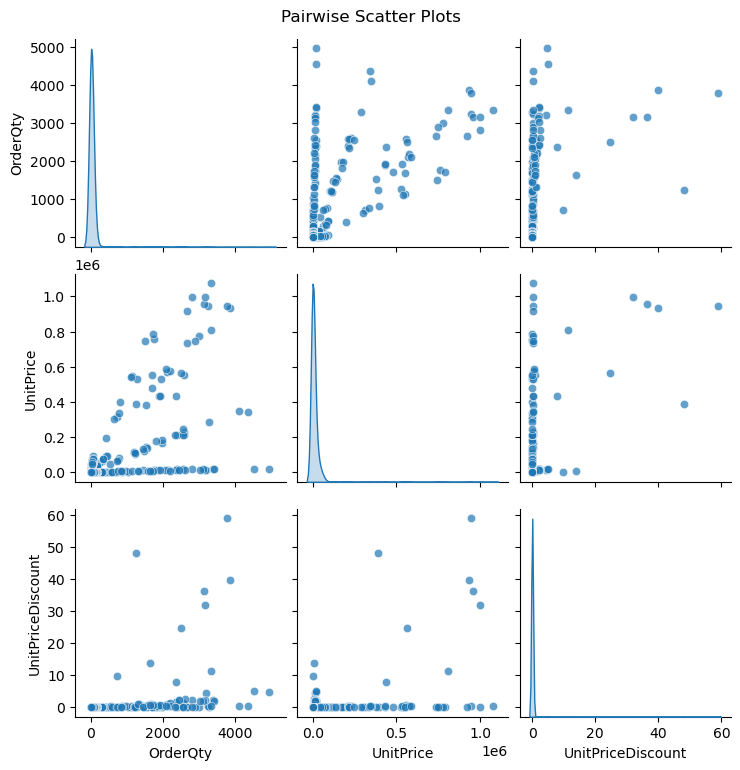

In [25]:
selected_features = ['OrderQty', 'UnitPrice', 'UnitPriceDiscount']

sns.pairplot(df[selected_features], diag_kind='kde', kind='scatter', plot_kws={'alpha': 0.7})

plt.suptitle("Pairwise Scatter Plots", y=1.02)

Text(0.5, 1.02, 'Pairwise Scatter Plots')

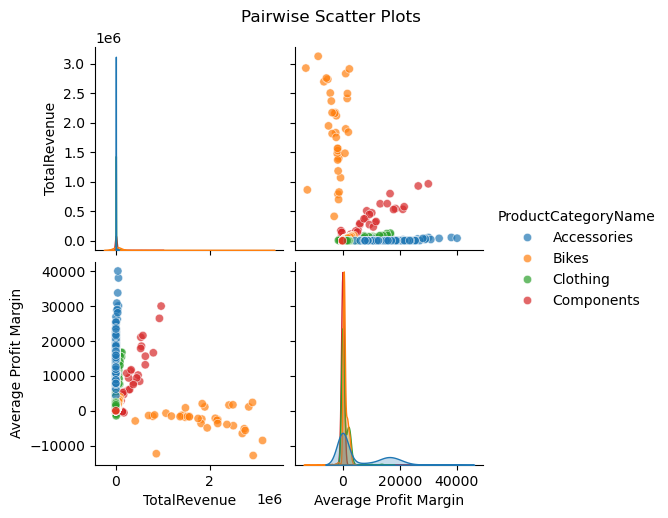

In [26]:
selected_features = ['TotalRevenue', 'Average Profit Margin']
hue_column = 'ProductCategoryName'

sns.pairplot(df[selected_features + [hue_column]], diag_kind='kde', hue='ProductCategoryName', kind='scatter', plot_kws={'alpha': 0.7})

plt.suptitle("Pairwise Scatter Plots", y=1.02)

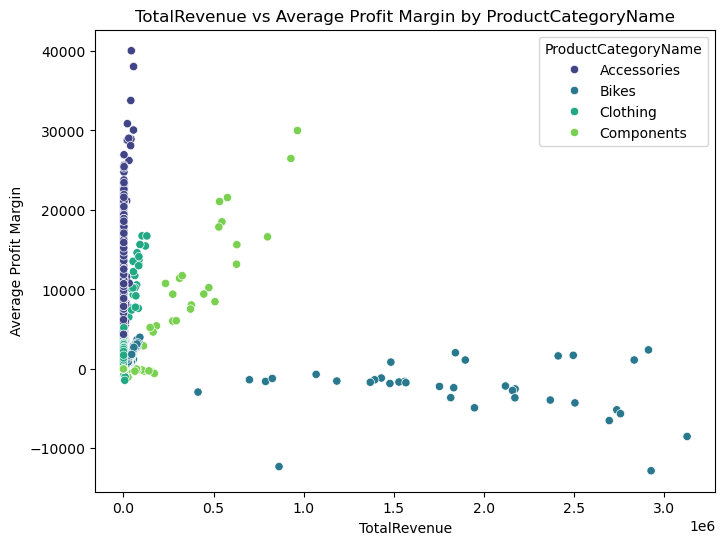

In [27]:
# Scatter plot: SalesAmount vs Average Profit Margin
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='TotalRevenue', y='Average Profit Margin', hue='ProductCategoryName', palette='viridis')
plt.title('TotalRevenue vs Average Profit Margin by ProductCategoryName')
plt.show()


In [28]:
grouped_data = df.groupby('ProductCategoryName').agg({
    'TotalRevenue': 'sum',
    'Average Profit Margin': 'mean',
    'OrderQty': 'sum'
}).reset_index()
print(grouped_data)


  ProductCategoryName  TotalRevenue  Average Profit Margin  OrderQty
0         Accessories  1.271447e+06            5619.510830   61920.0
1               Bikes  9.459730e+07             760.060341   90221.0
2            Clothing  2.119739e+06             905.353161   73651.0
3          Components  1.179625e+07             261.925826   49032.0


/var/folders/pf/4hxrldrx2g7g5x19dwlvk36w0000gn/T/ipykernel_11313/2154552959.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby('ProductCategoryName').agg({


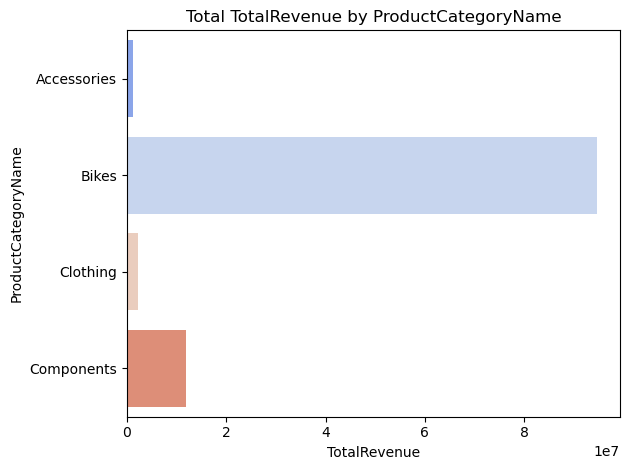

In [29]:
# Bar plot: Total TotalRevenue per TerritoryID

grouped_data = df.groupby('ProductCategoryName', observed=False)['TotalRevenue'].sum().reset_index()
sns.barplot(data=grouped_data, y='ProductCategoryName', x='TotalRevenue', hue='ProductCategoryName', legend=False, palette='coolwarm')
plt.title('Total TotalRevenue by ProductCategoryName')
plt.tight_layout()
plt.show()


In [30]:
df.columns

Index(['ProductCategoryName', 'OrderQty', 'UnitPrice', 'UnitPriceDiscount',
       'TaxAmt', 'Freight', 'TotalRevenue', 'Average Profit Margin'],
      dtype='object')

In [31]:
features = ['TotalRevenue', 'Average Profit Margin']

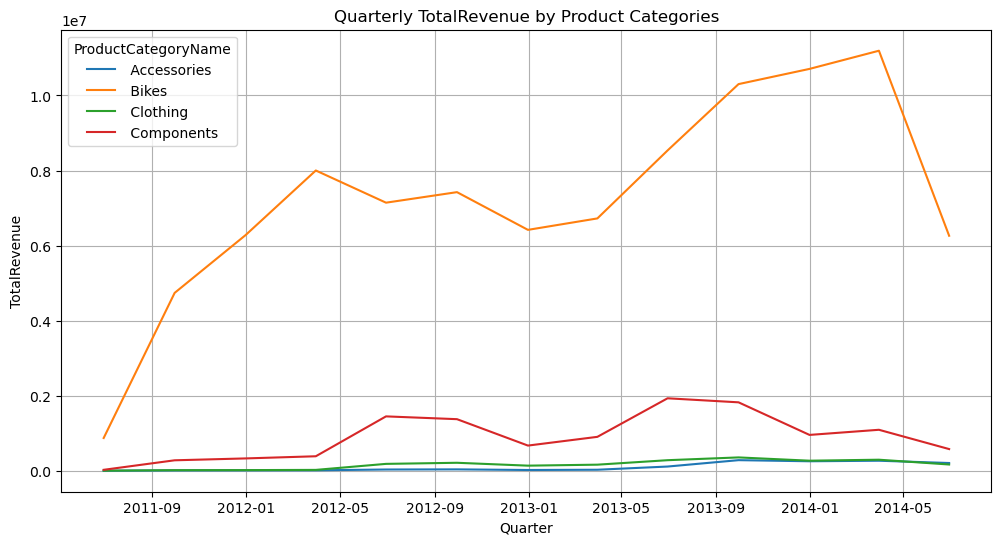

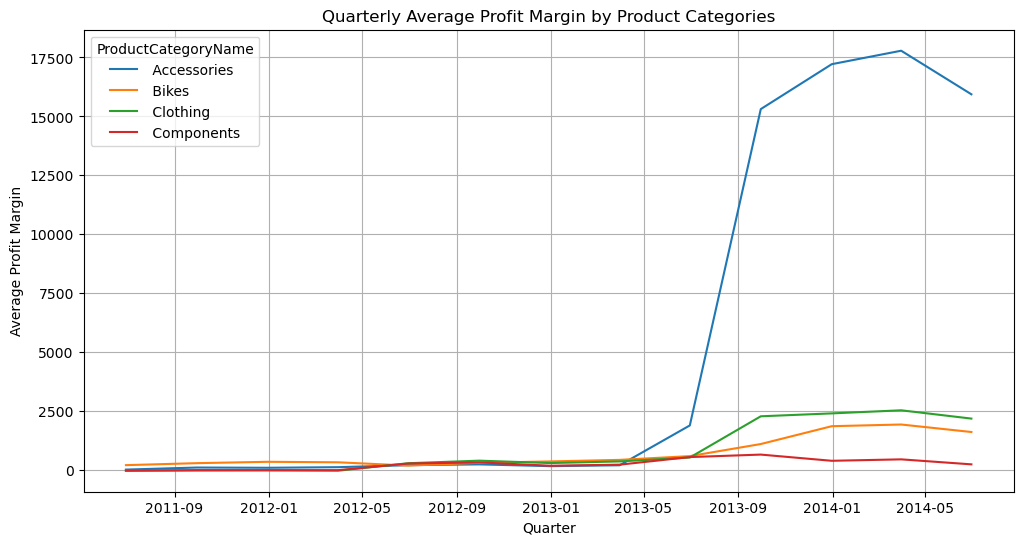

In [32]:
# Resample data to quarterly frequency and aggregate
quarterly_data = (
    df.groupby(['ProductCategoryName', pd.Grouper(freq='QE')], observed=True)  # 'Q' for quarterly aggregation
    .agg({
        'TotalRevenue': 'sum',
        'Average Profit Margin': 'mean'
    })
    .reset_index()
)

# Ensure all territories are included and group by both Quarter and ProductCategoryName
quarterly_data = quarterly_data.groupby(['OrderDate', 'ProductCategoryName'], observed=True).sum().reset_index()

# Plot the data
for feature in features:
    plt.figure(figsize=(12, 6))
    for territory in quarterly_data['ProductCategoryName'].unique():
        # Filter data for the current territory
        territory_data = quarterly_data[quarterly_data['ProductCategoryName'] == territory]
        if not territory_data.empty:  # Ensure there is data to plot
            plt.plot(territory_data['OrderDate'], territory_data[feature], label=f' {territory}')
    
    # Plot details
    plt.title(f'Quarterly {feature} by Product Categories')
    plt.xlabel('Quarter')
    plt.ylabel(feature)
    plt.legend(title='ProductCategoryName')
    plt.grid()
    plt.show()

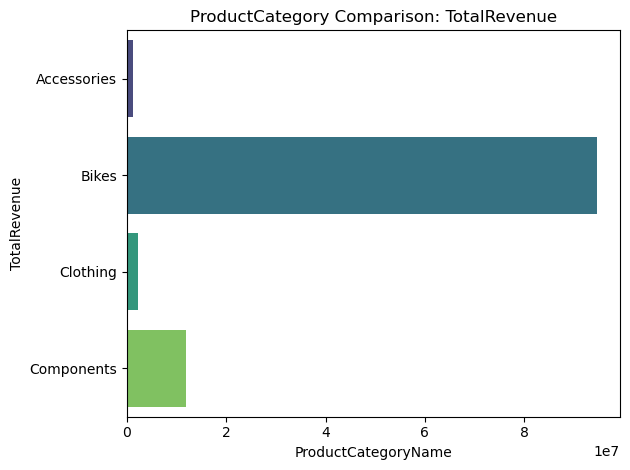

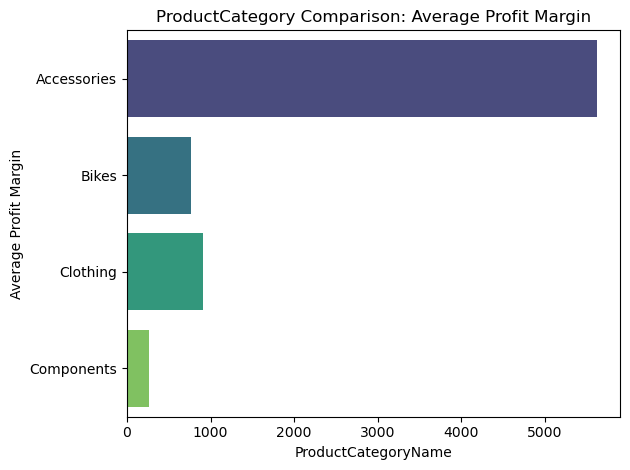

In [33]:
territory_comparison = (
    df.groupby(['ProductCategoryName'], observed=True)  # 'Q' for quarterly aggregation
    .agg({
        'TotalRevenue': 'sum',
        'Average Profit Margin': 'mean'
    })
    .reset_index()
)

for feature in features:
    sns.barplot(territory_comparison, y='ProductCategoryName', x=feature, hue='ProductCategoryName', legend=False, palette='viridis')
    plt.title(f'ProductCategory Comparison: {feature}')
    plt.xlabel('ProductCategoryName')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

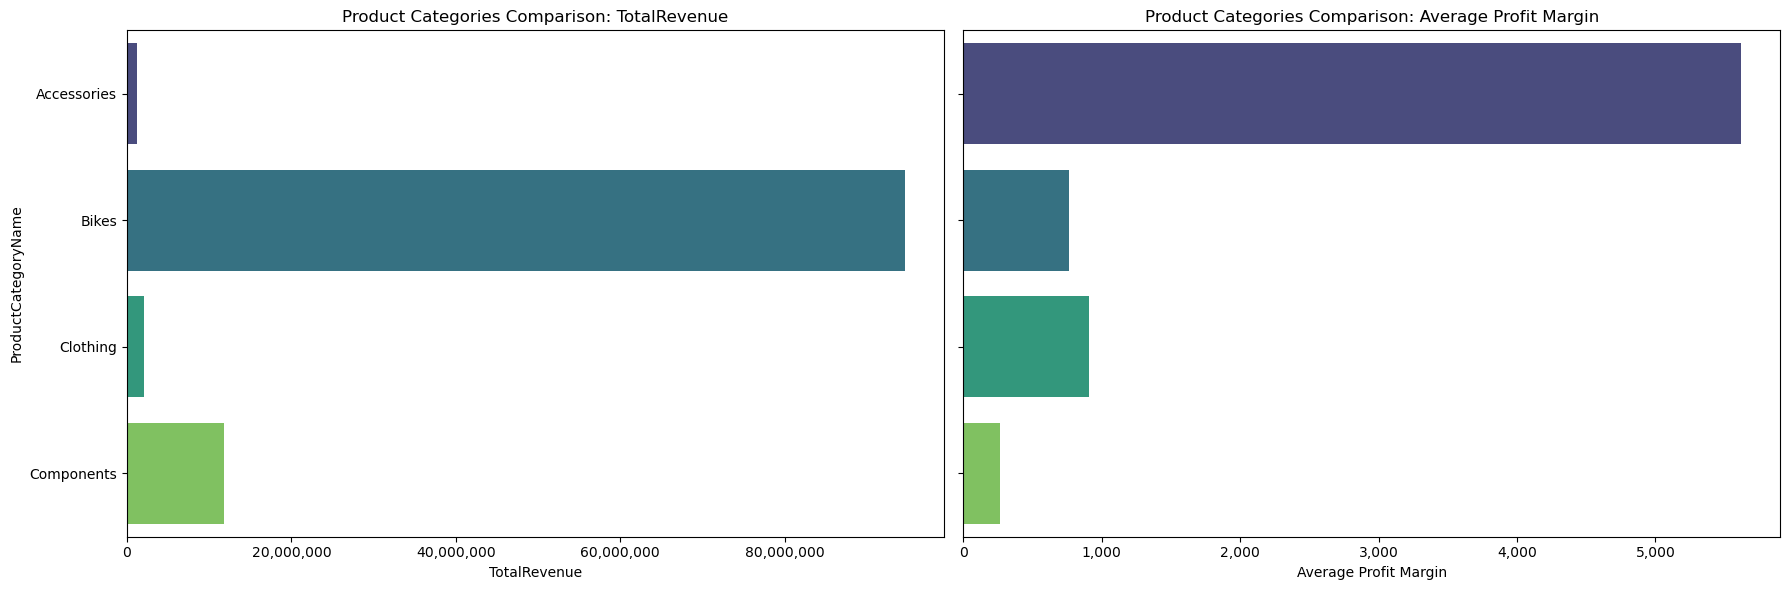

In [34]:
import matplotlib.ticker as ticker

features = ['TotalRevenue', 'Average Profit Margin']

territory_comparison = (
    df.groupby(['ProductCategoryName'], observed=True)  # 'Q' for quarterly aggregation
    .agg({
        'TotalRevenue': 'sum',
        'Average Profit Margin': 'mean'
    })
    .reset_index()
)

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)  # Adjust figsize as needed

# Loop through each feature and plot on the corresponding axis
for i, feature in enumerate(features):
    sns.barplot(
        data=territory_comparison,
        y='ProductCategoryName',
        x=feature,
        hue='ProductCategoryName',
        palette='viridis',
        ax=axes[i]  # Specify the axis for each plot
    )
    axes[i].set_title(f'Product Categories Comparison: {feature}')
    axes[i].set_xlabel(feature)
    # axes[i].set_ylabel('TerritoryName' if i == 0 else '')  # Only show y-axis label on the first plot
    axes[i].set_ylabel('ProductCategoryName')

    # Format x-axis values with commas
    axes[i].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    
    # Only remove the legend if it exists
    if axes[i].get_legend() is not None:
        axes[i].legend().remove()  # Remove redundant legends

# Adjust layout for clarity
plt.tight_layout()
plt.show()

In [35]:
import pingouin as pg

# Perform Welch's ANOVA for each metric
welch_anova1 = pg.welch_anova(dv='Average Profit Margin', between='ProductCategoryName', data=df)
print(welch_anova1)

welch_anova3 = pg.welch_anova(dv='TotalRevenue', between='ProductCategoryName', data=df)
print(welch_anova3)

# Extract the p-values
p_value1 = welch_anova1['p-unc'][0]
p_value3 = welch_anova3['p-unc'][0]

# Apply Bonferroni correction for multiple comparisons
alpha = 0.05
corrected_alpha = alpha / 3  # Bonferroni correction for 3 tests

# Conclusion based on the corrected p-values
if (p_value1 < corrected_alpha)  & (p_value3 < corrected_alpha):
    print("\nConclusion: All three p-values are less than the corrected alpha (0.05/3).")
    print("There are significant differences in all three sales metrics between territories.")
elif (p_value1 < corrected_alpha) | (p_value3 < corrected_alpha):
    print("\nConclusion: At least one p-value is less than the corrected alpha (0.05/3).")
    print("There are significant differences in at least one of the sales metrics between territories.")
else:
    print("\nConclusion: None of the p-values are less than the corrected alpha (0.05/3).")
    print("There are no significant differences in the three sales metrics between territories.")

                Source  ddof1        ddof2          F         p-unc       np2
0  ProductCategoryName      3  2304.528627  157.26535  9.883424e-93  0.199267
                Source  ddof1        ddof2          F         p-unc       np2
0  ProductCategoryName      3  2018.875635  28.817493  3.049519e-18  0.036642

Conclusion: All three p-values are less than the corrected alpha (0.05/3).
There are significant differences in all three sales metrics between territories.
